In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, Concatenate, DepthwiseConv2D, Multiply,
    Dropout, GlobalAveragePooling2D, Dense, MaxPooling2D, Flatten, Add, Reshape, AveragePooling2D
)
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
# Any additional code or custom layers you have can be added here.


In [8]:
input_shape = (224, 224, 3)

t_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\大四下\Final Year Project\Z. ProgressBackup\Model Training Results\Model_Training\AugDis\DataAug'

tt_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\大四下\Final Year Project\Z. ProgressBackup\Model Training Results\Model_Training\AugDis'


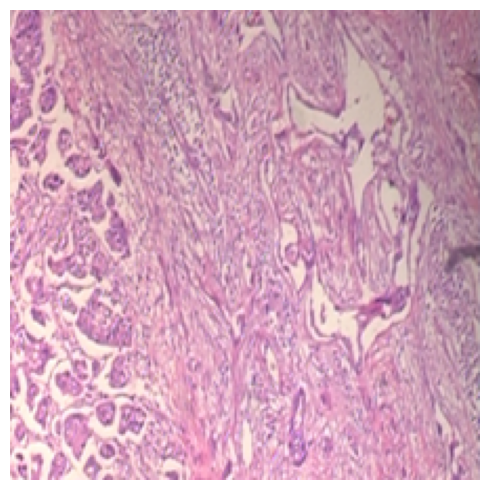

In [9]:
# train_BC = '/root/Breast Cancer/Datasets/40XResized/train/benign'

#Show the import original image
train_img_files = os.listdir(t_dir)
# test_img_files = os.listdir(test_dir)
# val_img_files = os.listdir(val_dir)

show_num = 1

plt.figure(figsize = (15, 5))

for i in range(show_num):
    
    img_path = os.path.join(t_dir, train_img_files[i])
    img = plt.imread(img_path)
    plt.subplot(1, show_num, i + 1)
    plt.imshow(img)
    plt.axis('off')
#     plt.title("Original Training Pic")
    
plt.tight_layout()
plt.show()


In [28]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.13,  # Specify the validation split here
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    tt_dir,
    target_size=input_shape[:2],
    batch_size=1,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

Found 1 images belonging to 1 classes.


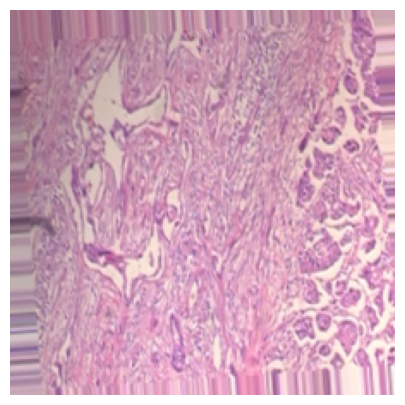

In [29]:
#To show the augmented pictures, after rotation, zoom in, rescale etc

# import scipy

# Extract a batch of images from the train_generator
sample_images, sample_labels = next(train_generator)

plt.figure(figsize = (15, 5))

# Show the original images from the batch
num_images_to_show = 1  # Show three images
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(sample_images[i-1])
#     plt.title("Augmented")
    plt.axis('off')